<a href="https://colab.research.google.com/github/nipacg/colab-project/blob/main/classification_titanic_nitatori_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## タイタニック乗客の生死についての分類予測

目的：
タイタニック号の乗客データを用いて乗客が生存したか死亡したか分類予測する機械学習モデルを構築し、予測精度向上のための手法について学習する。

In [ ]:
# Google ColabとGoogle Driveを連携
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ライブラリの読み込み

In [ ]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# グラフ描画の際、日本語の文字化けを防止するため以下を実行
!pip install japanize-matplotlib #日本語フォントのインストール
import japanize_matplotlib #日本語フォントのインポート

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 42.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=ba376a6008daa565c4a3d6cc4303be28ea4dc84cef9d9a13d6068afdfe3c0142
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
# バージョンの明記
!python --version
print('numpy',np.__version__)
print('pandas', pd.__version__)

Python 3.10.12
numpy 1.26.4
pandas 2.2.2


2024/10/03現在のバージョン  
Python 3.10.12  
numpy 1.26.4  
pandas 2.2.2  

## 初期定義
データセットのパスに変数を指定しデータを読み込める状態にする。  
csvファイルをデータフレームに格納し、データとして扱える状態にする。  
最終的にKaggleで予測精度の評価を受けるので、提出用csvファイルも読み込んでおく。

データセット取得先：https://www.kaggle.com/competitions/titanic  
データセット取得日：2024/08/19、10:00

In [ ]:
#データセットにパスを指定
dir_path = '/content/drive/MyDrive/Colab Notebooks/pandas_for_beginner/titanic/'

# 訓練用データと予測データはすでに分割されているので、そのまま読み込みdfを割り当てる
train_df = pd.read_csv(dir_path + 'train.csv')
test_df = pd.read_csv(dir_path + 'test.csv')

# submission用csvファイルを読み込む
# このcsvに予測結果を結合しKaggleにsubmissionすると予測精度が評価される
gender_submission = pd.read_csv(dir_path + 'gender_submission.csv')

## データの状態の確認

データ構造と内容、データクレンジングの必要性について調べる   

*   データフレームの確認 .head()
*   行列サイズ、データ型の確認 .info()
*   欠損値のカウント .isnull().sum()  

### train_df
* データ構造：891行12列  
* 行：PassengerId = 1～891
* 列：'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',    'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
* 欠損数：'Age'=177、'Cabin'=687、'Embarked'=2

In [ ]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
train_df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


量的データ = 7列 'Age', 'Fare', 'PassengerId', 'Survived', 'Pclass, 'SibSp', 'Parch'  
質的データ = 5列 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### test_df

### test_df
* データ構造：418行11列  
* 行：PassengerId = 892～1309
* 列：'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',    'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'
* train_dfに存在していた'Survived'がない
* 欠損数：'Age'=86、'Fare'=1、'Cabin'=327




In [ ]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
test_df.tail()

PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


量的データ = 6列 'Age', 'Fare', 'PassengerId', 'Pclass, 'SibSp', 'Parch'  
質的データ = 5列 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'

In [ ]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### gender_submission

### gender_submission
* データ構造：418行2列  
* 行：PassengerId = 892～1309
* 列：'PassengerId', 'Survived'
* train_dfに存在していた 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',    'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'がない
* 欠損数：欠損なし

In [ ]:
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [ ]:
gender_submission.tail()

PassengerId  Survived
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

In [ ]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


量的データ = 2列 'PassengerId', 'Survived'  
質的データ = 0列

In [ ]:
gender_submission.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

## 欠損値の取り扱いについて
今回は、欠損値を含む行を除外する

欠損数  
train_df：'Age'=177、'Cabin'=687、'Embarked'=2  
test_df：'Age'=86、'Fare'=1、'Cabin'=327  
gender_submission：なし

## 学習データと予測データの結合

In [ ]:
# データを連結
df = pd.concat([train_df, test_df],ignore_index=True)
df.shape

(1309, 12)

In [ ]:
# test_dfにはsurvivedカラムがないので欠損になっていることの確認
df.tail()

PassengerId  Survived  Pclass                          Name     Sex  \
1304         1305       NaN       3            Spector, Mr. Woolf    male   
1305         1306       NaN       1  Oliva y Ocana, Dona. Fermina  female   
1306         1307       NaN       3  Saether, Mr. Simon Sivertsen    male   
1307         1308       NaN       3           Ware, Mr. Frederick    male   
1308         1309       NaN       3      Peter, Master. Michael J    male   

       Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
1304   NaN      0      0           A.5. 3236    8.0500   NaN        S  
1305  39.0      0      0            PC 17758  108.9000  C105        C  
1306  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307   NaN      0      0              359309    8.0500   NaN        S  
1308   NaN      1      1                2668   22.3583   NaN        C

### 要約統計量の表示 .describe()

In [ ]:
df.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [ ]:
# percentilesを10%刻みで表示
df.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
10%     131.800000    0.000000     1.000000    14.000000     0.000000   
20%     262.600000    0.000000     1.000000    19.000000     0.000000   
30%     393.400000    0.000000     2.000000    22.000000     0.000000   
40%     524.200000    0.000000     2.000000    25.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
60%     785.800000    0.000000     3.000000    31.000000     0.000000   
70%     916.600000    1.000000     3.000000    36.000000     1.000000   
80%    1047.400000    1.000000     3.000000    42.000000     1.000000   
90%    1178.200000    1.000000     3.000000    50.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
10%       0.000000     7.567500  
20%       0.000000     7.854200  
30%       0.000000     8.050000  
40%       0.000000    10.500000  
50%       0.000000    14.454200  
60%       0.000000    21.679200  
70%       0.000000    26.955000  
80%       1.000000    41.579200  
90%       2.000000    78.050820  
max       9.000000   512.329200

In [ ]:
# オブジェクト型のカウント数、ユニーク数、最頻値、最頻値の出現数を表示
df.describe(include='O')

Name   Sex    Ticket        Cabin Embarked
count                   1309  1309      1309          295     1307
unique                  1307     2       929          186        3
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S
freq                       2   843        11            6      914

## EDAライブラリを使用し各特徴量を個別に把握

In [ ]:
# ydata-profilingで各特徴量を個別に把握
import warnings
warnings.filterwarnings('ignore')

!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d8397b90332db7c072460a1f203c9efd5f234bd41fa053b740484b5d50e9a01c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# # autovizで特徴量を個別に把握
# !pip install autoviz
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# df_av = AV.AutoViz(dir_path + 'train.csv')

In [ ]:
# # sweetvizで特徴量を個別に把握
# !pip install sweetviz

# import sweetviz as sv
# import pandas as pd

# # Sweetvizレポートの作成
# report = sv.analyze(train_df)

# # レポートの表示
# report.show_html('train_df_report.html')

## データの理解・可視化

train_dfに対して理解していく

In [ ]:
# 書式設定

# 青3色スタイル
sns.set_palette('Blues_r', 3)

# フォントサイズの設定
plt.rcParams['font.size'] = 12

# サイズの設定
plt.rcParams['figure.figsize'] = (6, 4)

### 死亡者と生存者

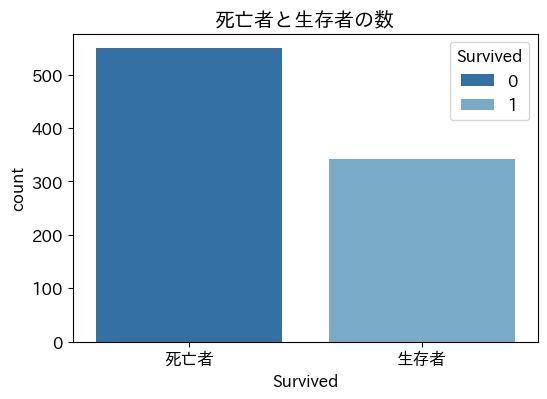

In [ ]:
sns.countplot(x='Survived', hue="Survived", data=train_df) #hue=で色分け
plt.title('死亡者と生存者の数')
plt.xticks([0, 1], ['死亡者', '生存者'])
plt.show()

In [ ]:
# 死亡者と生存者数の表示
display(train_df['Survived'].value_counts())

# 死亡者と生存者数の割合の表示
display(train_df['Survived'].value_counts() / len(train_df['Survived']))

Survived
0    549
1    342
Name: count, dtype: int64

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

#### 死亡者と生存者 読み取り

*   タイタニック号の死亡率は61.6%（549/891）
*   約3人のうち1人が事故から生還したことになる

### 性別

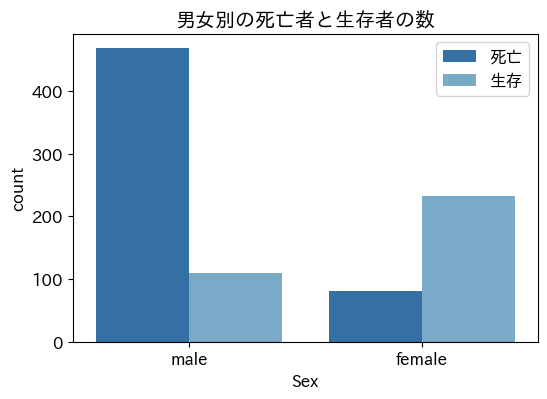

In [ ]:
sns.countplot(x='Sex', hue="Survived", data=train_df) #hue=で色分け
plt.title('男女別の死亡者と生存者の数')
plt.legend(['死亡', '生存'])
plt.show()

In [ ]:
# SexとSurvivedのクロス集計
display(pd.crosstab(train_df['Sex'], train_df['Survived']))

# クロス集計しSexごとに正規化する
display(pd.crosstab(train_df['Sex'], train_df['Survived'], normalize='index'))

Survived    0    1
Sex               
female     81  233
male      468  109

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

#### 性別 読み取り

*   生還率は女性74%、男性18%
*   死亡率は男性81%、女性25%
*   女性のほうが生還率が高い

### チケットクラス

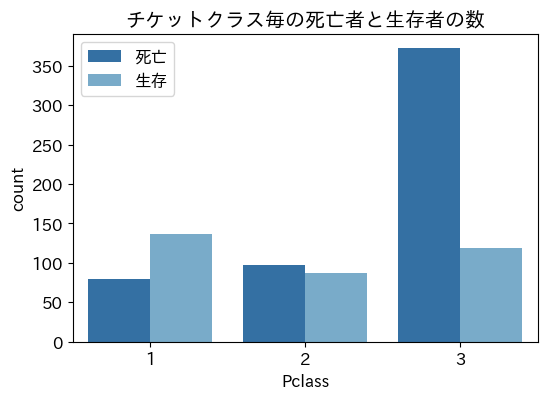

In [ ]:
sns.countplot(x='Pclass', hue="Survived", data=train_df) #hue=で色分け
plt.title('チケットクラス毎の死亡者と生存者の数')
plt.legend(['死亡', '生存'])
plt.show()

In [ ]:
# PclassとSurvivedのクロス集計
display(pd.crosstab(train_df['Pclass'], train_df['Survived']))

# クロス集計しPclassごとに正規化する
display(pd.crosstab(train_df['Pclass'], train_df['Survived'], normalize='index'))

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363

#### チケットクラス 読み取り
1 = 一等客室（上級）、2 = 二等客室（中級）、3 = 三等客室（下級）
*   生存割合は、一等62.9%、二等47.2%、三等24.2%
*   死亡割合は、三等75.7%、二等52.7%、三等37.0%
*   生存割合は一等が、死亡割合は三等が高い



### 年齢

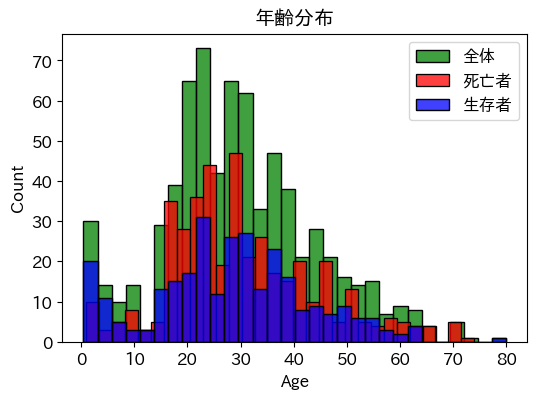

In [ ]:
# 全体のヒストグラム
sns.histplot(train_df['Age'].dropna(), kde=False, bins=30, color='green', label='全体')

# 死亡者のヒストグラム
sns.histplot(train_df[train_df['Survived'] == 0]['Age'].dropna(), kde=False, bins=30, color='red', label='死亡者')

# 生存者のヒストグラム
sns.histplot(train_df[train_df['Survived'] == 1]['Age'].dropna(), kde=False, bins=30, color='blue', label='生存者')

plt.title('年齢分布')
plt.legend()
plt.show()

In [ ]:
# 年齢を8等分し、CategoricalAgeという変数を作成
train_df['CategoricalAge'] = pd.cut(train_df['Age'].dropna(), 8)

# CategoricaiAgeとSurvivedのクロス集計
display(pd.crosstab(train_df['CategoricalAge'], train_df['Survived']))

# クロス集計しCategoricalAgeごとに正規化する
display(pd.crosstab(train_df['CategoricalAge'], train_df['Survived'], normalize='index'))

Survived            0   1
CategoricalAge           
(0.34, 10.368]     26  38
(10.368, 20.315]   71  44
(20.315, 30.263]  146  84
(30.263, 40.21]    86  69
(40.21, 50.158]    53  33
(50.158, 60.105]   25  17
(60.105, 70.052]   13   4
(70.052, 80.0]      4   1

Survived                 0         1
CategoricalAge                      
(0.34, 10.368]    0.406250  0.593750
(10.368, 20.315]  0.617391  0.382609
(20.315, 30.263]  0.634783  0.365217
(30.263, 40.21]   0.554839  0.445161
(40.21, 50.158]   0.616279  0.383721
(50.158, 60.105]  0.595238  0.404762
(60.105, 70.052]  0.764706  0.235294
(70.052, 80.0]    0.800000  0.200000

#### 年齢 読み取り


*   死亡割合よりも生存割合が高いのは0～10歳の年齢層



### タイタニック号に乗っている兄弟、配偶者の数

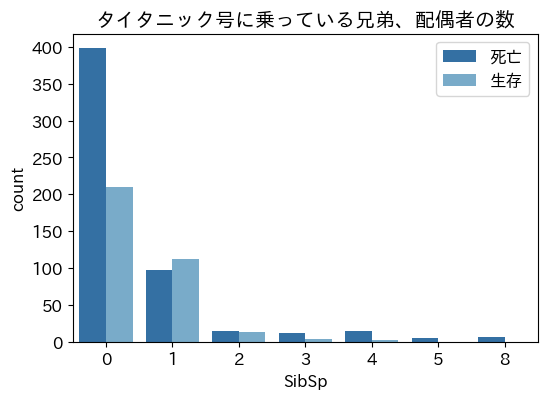

In [ ]:
sns.countplot(x='SibSp', hue="Survived", data=train_df) #hue=で色分け
plt.title('タイタニック号に乗っている兄弟、配偶者の数')
plt.legend(['死亡', '生存'])
plt.show()

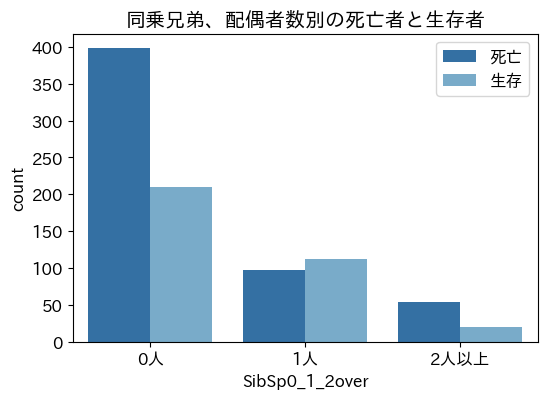

In [ ]:
# 2以上が極端に少ないので0、1、2以上でまとめる
train_df['SibSp0_1_2over'] = [i if i <= 1 else 2 for i in train_df['SibSp']]

# SibSp0_1_2overごとに集計し可視化
sns.countplot(x='SibSp0_1_2over', hue="Survived", data=train_df) #hue=で色分け
plt.title('同乗兄弟、配偶者数別の死亡者と生存者')
plt.xticks([0, 1, 2], ['0人', '1人', '2人以上'])
plt.legend(['死亡', '生存'])
plt.show()

In [ ]:
# SibSp0_1_2overとSurvivedのクロス集計
display(pd.crosstab(train_df['SibSp0_1_2over'], train_df['Survived']))

# クロス集計しSibSp0_1_2overごとに正規化する
display(pd.crosstab(train_df['SibSp0_1_2over'], train_df['Survived'], normalize='index'))

Survived          0    1
SibSp0_1_2over          
0               398  210
1                97  112
2                54   20

Survived               0         1
SibSp0_1_2over                    
0               0.654605  0.345395
1               0.464115  0.535885
2               0.729730  0.270270

#### 兄弟、配偶者の数 読み取り


*   生存割合が一番多いのは、タイタニック号に乗っている兄弟または配偶者が1人いる人
*   死亡割合が一番多いのは、タイタニック号に乗っている両親・子供の数がおらず単独で乗船した人

### タイタニック号に乗っている両親・子供の数

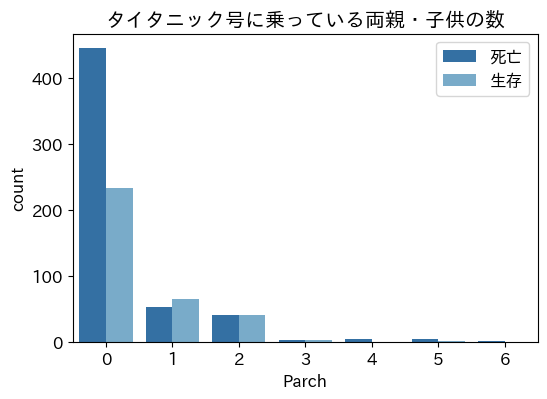

In [ ]:
sns.countplot(x='Parch', hue="Survived", data=train_df) #hue=で色分け
plt.title('タイタニック号に乗っている両親・子供の数')
plt.legend(['死亡', '生存'])
plt.show()

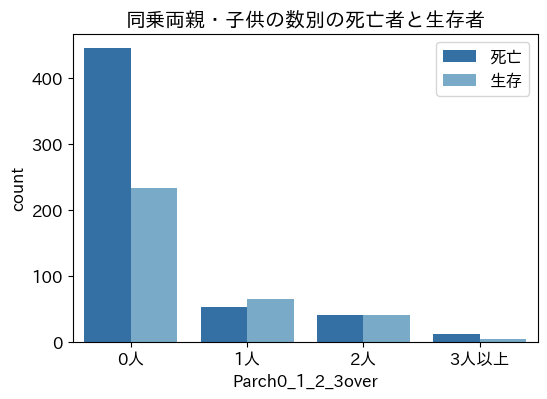

In [ ]:
# 3以上が極端に少ないので0、1、2、3以上でまとめる
train_df['Parch0_1_2_3over'] = [i if i <= 2 else 3 for i in train_df['Parch']]

# Parch0_1_2_3overごとに集計し可視化
sns.countplot(x='Parch0_1_2_3over', hue="Survived", data=train_df) #hue=で色分け
plt.title('同乗両親・子供の数別の死亡者と生存者')
plt.xticks([0, 1, 2, 3], ['0人', '1人', '2人', '3人以上'])
plt.legend(['死亡', '生存'])
plt.show()

In [ ]:
# Parch0_1_2_3overとSurvivedのクロス集計
display(pd.crosstab(train_df['Parch0_1_2_3over'], train_df['Survived']))

# クロス集計しParch0_1_2_3overごとに正規化する
display(pd.crosstab(train_df['Parch0_1_2_3over'], train_df['Survived'], normalize='index'))

Survived            0    1
Parch0_1_2_3over          
0                 445  233
1                  53   65
2                  40   40
3                  11    4

Survived                 0         1
Parch0_1_2_3over                    
0                 0.656342  0.343658
1                 0.449153  0.550847
2                 0.500000  0.500000
3                 0.733333  0.266667

#### 両親・子供の数 読み取り


*   生存割合が一番多いのは、タイタニック号に乗っている両親・子供の数が1人いる人
*   死亡割合が一番多いのは、タイタニック号に乗っている両親・子供の数がおらず単独で乗船した人

### 単独乗船・家族と乗船

「タイタニック号に乗っている兄弟、配偶者の数」と「タイタニック号に乗っている両親・子供の数」を見ると、どちらも0の者（単独乗船者）が多く、その生存率が低いことが分かる。  
SibSpとParchを組み合わせて単独乗船者の特徴量を作成し可視化する。

In [ ]:
# 自分を含めた家族の人数を計算
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] >= 2, 'IsAlone'] = 1

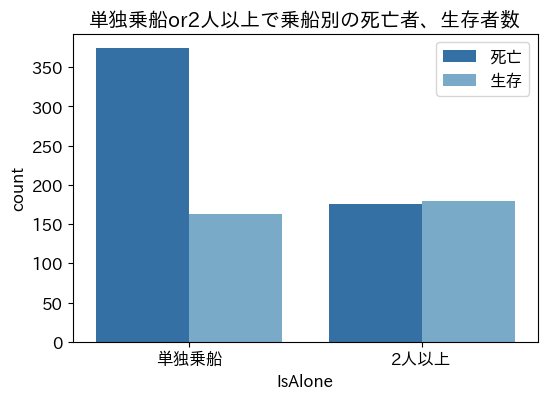

In [ ]:
# IsAloneの内容を可視化
sns.countplot(x='IsAlone', hue="Survived", data=train_df) #hue=で色分け
plt.title('単独乗船or2人以上で乗船別の死亡者、生存者数')
plt.xticks([0, 1], ['単独乗船', '2人以上'])
plt.legend(['死亡', '生存'])
plt.show()

In [ ]:
# IsAloneとSurvivedのクロス集計
display(pd.crosstab(train_df['IsAlone'], train_df['Survived']))

# クロス集計しIsAloneごとに正規化する
display(pd.crosstab(train_df['IsAlone'], train_df['Survived'], normalize='index'))

Survived    0    1
IsAlone           
0         374  163
1         175  179

Survived         0         1
IsAlone                     
0         0.696462  0.303538
1         0.494350  0.505650

In [ ]:
# 単独乗船は、家族と乗船した人は死亡率がどれくらい高くなるのか計算
70 / 50

1.4

#### 単独乗船・家族と乗船 読み取り


*   家族と乗船した人は死亡率50%だが、単独乗船者は70%
*   単独乗船だと死亡率が1.4倍高くなる

### 家族の構成人数による違い

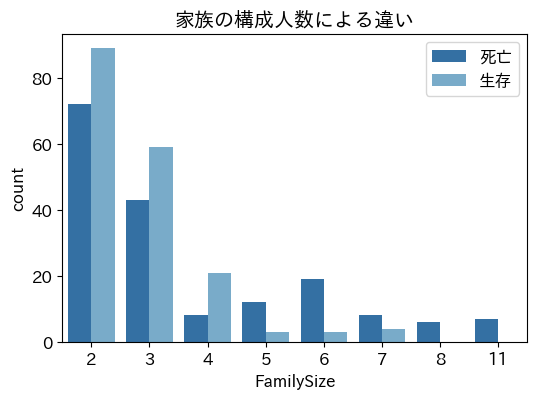

In [ ]:
# FamilySizeごとに集計し可視化

# FamilySize==1をドロップ
train_df = train_df[train_df['FamilySize'] != 1]
sns.countplot(x='FamilySize', hue="Survived", data=train_df) #hue=で色分け
plt.title('家族の構成人数による違い')
plt.legend(['死亡', '生存'])
plt.show()

In [ ]:
# FamilySizeとSurvivedのクロス集計
display(pd.crosstab(train_df['FamilySize'], train_df['Survived']))

# クロス集計しFamilySizeごとに正規化する
display(pd.crosstab(train_df['FamilySize'], train_df['Survived'], normalize='index'))

Survived     0   1
FamilySize        
2           72  89
3           43  59
4            8  21
5           12   3
6           19   3
7            8   4
8            6   0
11           7   0

Survived           0         1
FamilySize                    
2           0.447205  0.552795
3           0.421569  0.578431
4           0.275862  0.724138
5           0.800000  0.200000
6           0.863636  0.136364
7           0.666667  0.333333
8           1.000000  0.000000
11          1.000000  0.000000

#### 家族の構成人数による違い 読み取り

*   家族を構成する人数が5名を超えると死亡率が生存率を上回る

### 運賃

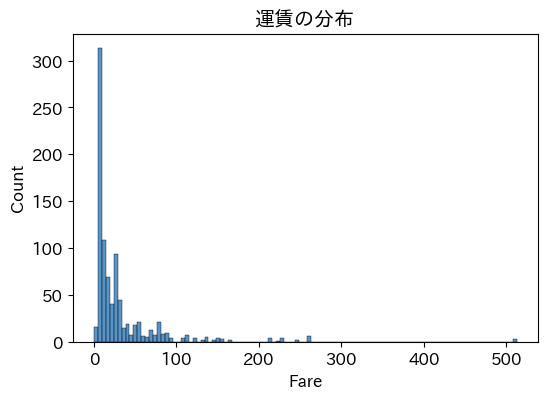

In [ ]:
sns.histplot(train_df['Fare'].dropna(), kde=False) #hue=で色分け
plt.title('運賃の分布')
plt.show()

In [ ]:
# 運賃で乗客人数を4分割し生存者の割合を確認（0が最安価格帯、3が最高価格帯）
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 4)
train_df[['CategoricalFare','Survived']].groupby(['CategoricalFare'], as_index=False).mean()

CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

0が最安価格帯、3が最高価格帯

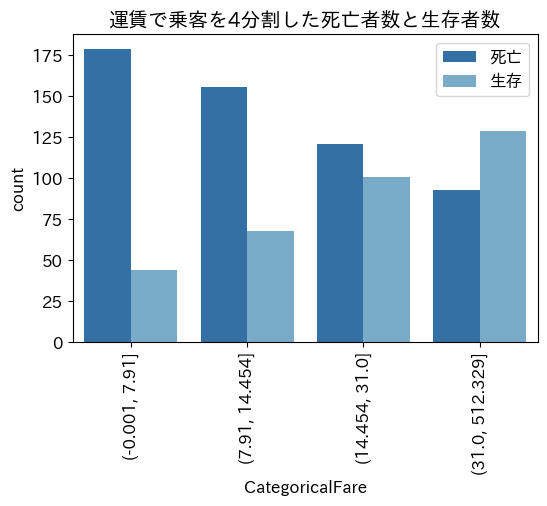

In [ ]:
# CategoricalFareの内容を可視化
sns.countplot(x='CategoricalFare', hue="Survived", data=train_df) #hue=で色分け
plt.title('運賃で乗客を4分割した死亡者数と生存者数')
plt.xticks(rotation=90)
plt.legend(['死亡', '生存'])
plt.show()

In [ ]:
# CategoricalFareとSurvivedのクロス集計
display(pd.crosstab(train_df['CategoricalFare'], train_df['Survived']))

# クロス集計しCategoricalFareごとに正規化する
display(pd.crosstab(train_df['CategoricalFare'], train_df['Survived'], normalize='index'))

Survived           0    1
CategoricalFare          
(-0.001, 7.91]   179   44
(7.91, 14.454]   156   68
(14.454, 31.0]   121  101
(31.0, 512.329]   93  129

Survived                0         1
CategoricalFare                    
(-0.001, 7.91]   0.802691  0.197309
(7.91, 14.454]   0.696429  0.303571
(14.454, 31.0]   0.545045  0.454955
(31.0, 512.329]  0.418919  0.581081

#### 運賃 読み取り

*   (31.0, 512.329]の最高価格帯のみが、死亡率よりも生存率を上回っている



### 名前

In [ ]:
# はじめの5人の名前を確認
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
# 敬称を抽出して重複を省く
set(train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False))

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [ ]:
# 敬称のカウント
train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
# 抽出した敬称をTitle列に入れて年齢の平均を算出
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_df[['Title', 'Age']].groupby(['Title'], as_index=False).mean()

Title        Age
0       Capt  70.000000
1        Col  58.000000
2   Countess  33.000000
3        Don  40.000000
4         Dr  42.000000
5   Jonkheer  38.000000
6       Lady  48.000000
7      Major  48.500000
8     Master   4.574167
9       Miss  21.773973
10      Mlle  24.000000
11       Mme  24.000000
12        Mr  32.368090
13       Mrs  35.898148
14        Ms  28.000000
15       Rev  43.166667
16       Sir  49.000000

#### 名前 読み取り

*   Masterは15歳以下の男の子。子供の生存率は高かったので特徴量として有効と考えられる

In [ ]:
# Mr=1, Miss=2, Mrs=3, Master=4, その他=5として分類
def title_to_num(title):
    if title == 'Mr':
        return 1
    elif title == 'Miss':
        return 2
    elif title == 'Mrs':
        return 3
    elif title == 'Master':
        return 4
    else:
        return 5

In [ ]:
# test_dfにもtitle列を作成
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# リスト内包表記を用いて変換
train_df['Title_num'] = [title_to_num(i) for i in train_df['Title']]
test_df['Title_num'] = [title_to_num(i) for i in test_df['Title']]

## データの加工・前処理

### カテゴリ変数の数値変換

In [ ]:
# SexとEmbarkedを数値変換　ワンホットエンコーディング
train = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], dtype=np.int8)
test = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], dtype=np.int8)

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  ... FamilySize  IsAlone  CategoricalFare  \
0         A/5 21171   7.2500   NaN  ...          2        1   (-0.001, 7.91]   
1          PC 17599  71.2833   C85  ...          2        1  (31.0, 512.329]   
2  STON/O2. 3101282   7.9250   NaN  ...          1        0   (7.91, 14.454]   
3            113803  53.1000  C123  ...          2        1  (31.0, 512.329]   
4            373450   8.0500   NaN  ...          1        0   (7.91, 14.454]   

   Title  Title_num Sex_female Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0     Mr          1          0        1           0           0           1  
1    Mrs          3          1        0           1           0           0  
2   Miss          2          1        0           0           0           1  
3    Mrs          3          1        0           0           0           1  
4     Mr          1          0        1           0           0           1  

[5 rows x 23 columns]

In [ ]:
# 不要な列の削除
train = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S']]
test = test[['Pclass',	'Age', 'SibSp',	'Parch', 'Fare', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [ ]:
display(train.head())

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       3  22.0      1      0   7.2500           0         1   
1         1       1  38.0      1      0  71.2833           1         0   
2         1       3  26.0      0      0   7.9250           1         0   
3         1       1  35.0      1      0  53.1000           1         0   
4         0       3  35.0      0      0   8.0500           0         1   

   Embarked_C  Embarked_Q  Embarked_S  
0           0           0           1  
1           1           0           0  
2           0           0           1  
3           0           0           1  
4           0           0           1

In [ ]:
display(test.head())

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  34.5      0      0   7.8292           0         1           0   
1       3  47.0      1      0   7.0000           1         0           0   
2       2  62.0      0      0   9.6875           0         1           0   
3       3  27.0      0      0   8.6625           0         1           0   
4       3  22.0      1      1  12.2875           1         0           0   

   Embarked_Q  Embarked_S  
0           1           0  
1           0           1  
2           1           0  
3           0           1  
4           0           1

## モデルの作成

In [ ]:
# LightGBMでモデリング
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### ホールドアウト法

In [ ]:
# X_trainをtrainのSurvived列以外、y_trainをtrainのSurvived列とする
X_train = train.drop(columns=['Survived'])
y_train = train['Survived']

X_trainとy_trainを 67%:33%=train:varid に分割して学習し性能の評価を行う  
train66%で学習を行い、varid33%で予測の性能を評価していく

In [ ]:
# X_trainとy_trainをtrain66%とvarid33%に分ける
train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.33, random_state=0)

In [ ]:
# lgb.Datasetでtrainとvaliを作成
lgb_train = lgb.Dataset(train_x, train_y)
lgb_eval = lgb.Dataset(valid_x, valid_y)

In [ ]:
# パラメータを定義
lgbm_params = {'objective': 'binary'}

In [ ]:
# lgb.trainで学習
evals_result = {}
gbm = lgb.train(params=lgbm_params,
                train_set=lgb_train,
                valid_sets=[lgb_train, lgb_eval],
                num_boost_round=100,  # ブースティングのラウンド数
                callbacks=[lgb.early_stopping(stopping_rounds=20),  # アーリーストッピング
                           lgb.record_evaluation(evals_result),    # 評価結果の記録
                           lgb.log_evaluation(period=10)])         # 10ラウンドごとに進捗を表示

[LightGBM] [Info] Number of positive: 231, number of negative: 365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.387584 -> initscore=-0.457480
[LightGBM] [Info] Start training from score -0.457480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

### モデルの評価

In [ ]:
# valid_xについての予測
oof = (gbm.predict(valid_x) > 0.5).astype(int)
print('score', round(accuracy_score(valid_y, oof) * 100, 2))

score 82.37


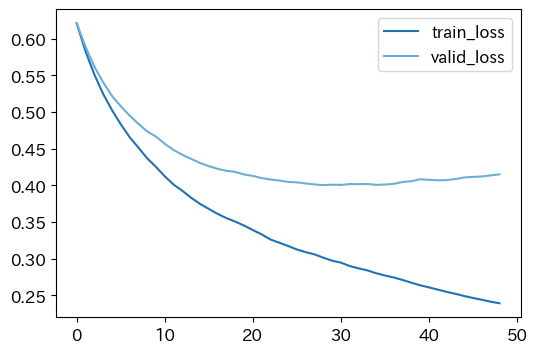

In [ ]:
plt.plot(evals_result['training']['binary_logloss'], label='train_loss')
plt.plot(evals_result['valid_1']['binary_logloss'], label='valid_loss')
plt.legend()
plt.show()

In [ ]:
test_pred = (gbm.predict(test) > 0.5).astype(int)
test_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
gender_submission['Survived'] = test_pred
gender_submission

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [ ]:
gender_submission.to_csv('lgbm_submission.csv', index=False)

### k分割交差検証（k=3）

In [ ]:
from sklearn.model_selection import KFold

# 3分割交差検証を指定し、インスタンス化
kf = KFold(n_splits=3, shuffle=True)

In [ ]:
# スコアとモデルを格納するリスト
score_list = []
models = []

for fold_, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print(f'fold{fold_ + 1} start')
    train_x = X_train.iloc[train_index]
    train_y = y_train[train_index]
    valid_x = X_train.iloc[valid_index]
    valid_y = y_train[valid_index]

    # lab.Datasetを使って、trainとvaridを作っておく
    lgb_train = lgb.Dataset(train_x, train_y)
    lgb_valid = lgb.Dataset(valid_x, valid_y)

    # パラメータを定義
    lgbm_params = {'objective': 'binary'}

    # lgb.trainで学習
    gbm = lgb.train(params = lgbm_params,
                    train_set = lgb_train,
                    valid_sets = [lgb_train, lgb_valid],
                    callbacks=[lgb.early_stopping(stopping_rounds=20)],
                    valid_names=['train', 'valid']
                    )
    oof = (gbm.predict(valid_x) > 0.5).astype(int)
    score_list.append(round(accuracy_score(valid_y, oof) * 100, 2))
    models.append(gbm) # 学習が終わったモデルをリストに入れておく
    print(f'fold{fold_ + 1} end\n' )

print(score_list, '平均score' ,round(np.mean(score_list), 2))

fold1 start
[LightGBM] [Info] Number of positive: 229, number of negative: 365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385522 -> initscore=-0.466175
[LightGBM] [Info] Start training from score -0.466175
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
# テストデータの予測を格納する、418行3列のnumpy行列を作成
test_pred = np.zeros((len(test), 3))
test_pred

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
test_pred.shape

(418, 3)

In [ ]:
for fold_, gbm in enumerate(models):
    test_pred[:, fold_] = gbm.predict(test) # testを予測

In [ ]:
pred = (np.mean(test_pred, axis=1) > 0.5).astype(int)
gender_submission['Survived'] = pred
gender_submission.to_csv('lgbm_submission2.csv', index=False)

## 重要度の表示

In [ ]:
pd.DataFrame({'特徴' : X_train.columns,
              '重要度' : gbm.feature_importance()}).sort_values('重要度', ascending=False)

特徴  重要度
1         Age  265
4        Fare  223
0      Pclass   56
5  Sex_female   28
2       SibSp   25
7  Embarked_C   18
9  Embarked_S   12
3       Parch    5
8  Embarked_Q    4
6    Sex_male    0